<a href="https://colab.research.google.com/github/RioSatriatama/Data-Analyst_Study-Case-Ulasan-Aplikasi-Kredit-Online-Kredivo-/blob/main/Data_Analyst_Ulasan_Aplikasi_Kredit_Online(Kredivo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx

# Loading the dataset
file_path = 'Kredivo.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Displaying the head of the dataframe to understand its structure
print(df.head())
print(df.columns)

          userName  score                   at  \
0  Pengguna Google      5  2024-09-08 02:58:28   
1  Pengguna Google      5  2024-09-08 02:58:08   
2  Pengguna Google      1  2024-09-08 02:56:44   
3  Pengguna Google      5  2024-09-08 02:55:35   
4  Pengguna Google      5  2024-09-08 02:54:51   

                                             content  
0  Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                        Membantu...  
2  Perhatian ,Tolong para pengguna dan yg punya a...  
3                                               Kren  
4  aplikasi yang sangat membantu kebutuhan dengan...  
Index(['userName', 'score', 'at', 'content'], dtype='object')


In [ ]:
# Importing the SentimentIntensityAnalyzer for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Downloading the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Applying the sentiment analysis to the content column
# Creating a new column 'sentiment_score' to store the results
df['sentiment_score'] = df['content'].apply(get_sentiment)

# Displaying the head of the dataframe with the new sentiment score column
print(df[['content', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  sentiment_score
0  Kredivo sangan membatu thebest bnget. Tapi ada...              0.0
1                                        Membantu...              0.0
2  Perhatian ,Tolong para pengguna dan yg punya a...              0.0
3                                               Kren              0.0
4  aplikasi yang sangat membantu kebutuhan dengan...              0.0


<ipython-input-3-6f1eb0bfa80e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')


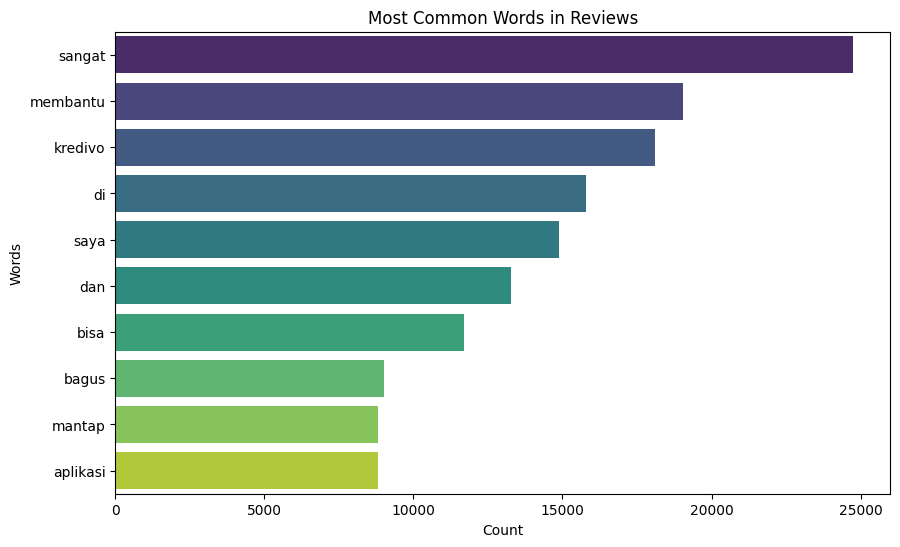

In [ ]:
# Function to plot the most common words in the content
from collections import Counter
import re

# Preprocessing the text data: removing punctuation and converting to lowercase
processed_content = df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Splitting the processed content into words
all_words = ' '.join(processed_content).split()

# Counting the frequency of each word
word_counts = Counter(all_words)

# Getting the 10 most common words
most_common_words = word_counts.most_common(10)

# Creating a DataFrame for visualization
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plotting the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
plt.title('Most Common Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

<ipython-input-4-bfa715fae749>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='pastel')


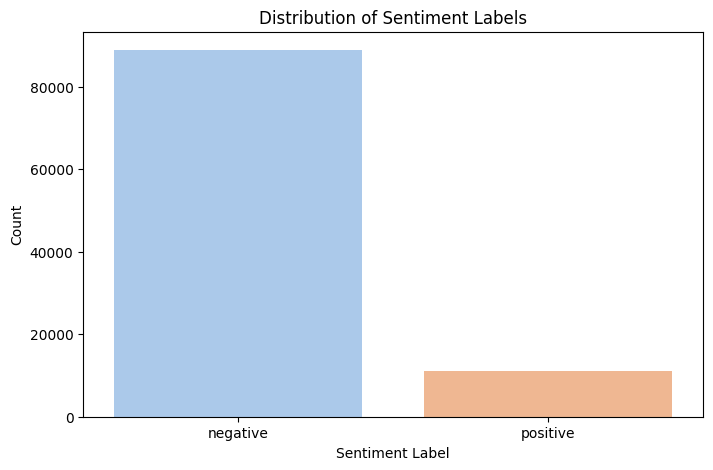

In [ ]:
# Classifying the sentiment based on the sentiment score
# Creating a new column 'sentiment_label' for classification

df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Displaying the distribution of sentiment labels
sentiment_distribution = df['sentiment_label'].value_counts()

# Plotting the distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='pastel')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Preparing data for regression analysis
# Splitting the data into features and target variable
X = df[['sentiment_score']]
Y = df['score']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = regressor.predict(X_test)

# Calculating the regression coefficients and intercept
coefficients = regressor.coef_[0]
intercept = regressor.intercept_

# Displaying the regression coefficients and intercept
print('Regression Coefficient:', coefficients)
print('Intercept:', intercept)

Regression Coefficient: 1.1655680453723987
Intercept: 4.360521193516036
